# Урок 7. Непараметрические тесты

Импорт необходимых библиотек:

In [37]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Задача №1

_Выбрать тест и проверить, есть ли различия между выборками:_
_Даны две независимые выборки. Не соблюдается условие нормальности
x1 **380, 420, 290**
y1 **140, 360, 200, 900**
Сделайте вывод по результатам, полученным с помощью функции_

In [50]:
alpha = 0.05
x_array = np.array([380, 420, 290])
y_array = np.array([140, 360, 200, 900])
d = stats.mannwhitneyu(x_array, y_array)
stat, p_val = stats.mannwhitneyu(x_array, y_array)

print('Статистика: %.2f\nР-value: %.3f' % d)

if p_val > alpha:
    print('Нулевая гипотеза подтверждается, статистически значимых различий нет.')
else:
    print('Верна альтернативная гипотеза, статистически значимые различия есть.')

Статистика: 8.00
Р-value: 0.629
Нулевая гипотеза подтверждается, статистически значимых различий нет.


## Задача №2

_Исследовалось влияние препарата на уровень давления пациентов. Сначала измерялось давление до приема препарата, потом через 10 минут и через 30 минут. Есть ли статистически значимые различия?_

_1е измерение до приема препарата: **150, 160, 165, 145, 155**
2е измерение через 10 минут: **140, 155, 150,  130, 135**
3е измерение через 30 минут: **130, 130, 120, 130, 125**_

In [51]:
alpha = 0.05
x_array_1 = np.array([150, 160, 165, 145, 155])
x_array_2 = np.array([140, 155, 150, 130, 135])
x_array_3 = np.array([130, 130, 120, 130, 125])
d = stats.friedmanchisquare(x_array_1, x_array_2, x_array_3)
stat, p_val = stats.friedmanchisquare(x_array_1, x_array_2, x_array_3)

print('Статистика: %.2f\nР-value: %.3f' % d)

if p_val > alpha:
    print('Нулевая гипотеза подтверждается, статистически значимых различий нет.')
else:
    print('Верна альтернативная гипотеза, статистически значимые различия есть.')

Статистика: 9.58
Р-value: 0.008
Верна альтернативная гипотеза, статистически значимые различия есть.


# Задача №3

_Сравните 1 и 2-е измерения, предполагая, что 3-го измерения через 30 минут не было._

In [52]:
alpha = 0.05
x_array_1 = np.array([150, 160, 165, 145, 155])
x_array_2 = np.array([140, 155, 150, 130, 135])
d = stats.wilcoxon(x_array_1, x_array_2)
stat, p_val = stats.wilcoxon(x_array_1, x_array_2)

print('Статистика: %.2f\nР-value: %.3f' % d)

if p_val > alpha:
    print('Нулевая гипотеза подтверждается, статистически значимых различий нет.')
else:
    print('Верна альтернативная гипотеза, статистически значимые различия есть')

Статистика: 0.00
Р-value: 0.062
Нулевая гипотеза подтверждается, статистически значимых различий нет.


# Задача №4

_Даны 3 группы учеников плавания.
В 1 группе время на дистанцию 50 м составляют: **56, 60, 62, 55, 71, 67, 59, 58, 64, 67**
Вторая группа : **57, 58, 69, 48, 72, 70, 68, 71, 50, 53**
Третья группа: **57, 67, 49, 48, 47, 55, 66, 51, 54**_

In [53]:
alpha = 0.05
x_array_1 = np.array([56, 60, 62, 55, 71, 67, 59, 58, 64, 67])
x_array_2 = np.array([57, 58, 69, 48, 72, 70, 68, 71, 50, 53])
x_array_3 = np.array([57, 67, 49, 48, 47, 55, 66, 51, 54])
d = stats.kruskal(x_array_1, x_array_2, x_array_3)
stat, p_val = stats.kruskal(x_array_1, x_array_2, x_array_3)

print('Статистика: %.2f\nР-value: %.3f' % d)

if p_val > alpha:
    print('Нулевая гипотеза подтверждается, статистически значимых различий нет.')
else:
    print('Верна альтернативная гипотеза, статистически значимые различия есть')

Статистика: 5.47
Р-value: 0.065
Нулевая гипотеза подтверждается, статистически значимых различий нет.


# Задача №5

_Заявляется, что партия изготавливается со средним арифметическим 2,5 см.
Проверить данную гипотезу, если известно, что размеры изделий подчинены нормальному закону распределения.
Объем выборки 10, уровень статистической значимости 5%._
- **2.51, 2.35, 2.74, 2.56, 2.40, 2.36, 2.65, 2.7, 2.67, 2.34**

Формируем нулевую гипотезу: средний размер изделий равен 2.5 см.
- H<sub>0</sub> = 2.5  -  _нулевая гипотеза_

Формируем альтернативную гипотезу: средний размер изделий не равен 2.5 см.
- H<sub>1</sub> ≠ 2.5  -  _альтернативная гипотеза_

### Данные:

In [42]:
data = [2.51, 2.35, 2.74, 2.56, 2.40, 2.36, 2.65, 2.7, 2.67, 2.34]  # выборка
alpha = 0.05  # уровень статистической значимости
n = len(data)  # размер выборки

Для проверки гипотезы о том, что партия имеет среднее арифметическое 2,5 см, мы можем использовать одновыборочный t-тест.
Сперва необходимо рассчитать выборочное среднее и выборочное стандартное отклонение:

### Выборочное среднее:

In [43]:
mean = np.mean(data)  # Выборочное среднее (m)
print(f'm = (2.51 + 2.35 + 2.74 + 2.56 + 2.40 + 2.36 + 2.65 + 2.7 + 2.67 + 2.34) / {n}')
print(f'm = {mean:.3f}')

m = (2.51 + 2.35 + 2.74 + 2.56 + 2.40 + 2.36 + 2.65 + 2.7 + 2.67 + 2.34) / 10
m = 2.528


### Стандартное отклонение выборки:

In [44]:
std = np.std(data, ddof=1)  # Стандартное отклонение выборки (s)
print(
    f's = sqrt(((2.51 - {mean:.3f})**2 + (2.35 - {mean:.3f})**2 + (2.74 - {mean:.3f})**2 + (2.56 - {mean:.3f})**2 + (2.40 - {mean:.3f})**2 + (2.36 - {mean:.3f})**2 + (2.65 - {mean:.3f})**2 + (2.7 - {mean:.3f})**2 + (2.67 - {mean:.3f})**2 + (2.34 - {mean:.3f})**2) / ({n} - 1))')
print(f's = {std:.3f}')

s = sqrt(((2.51 - 2.528)**2 + (2.35 - 2.528)**2 + (2.74 - 2.528)**2 + (2.56 - 2.528)**2 + (2.40 - 2.528)**2 + (2.36 - 2.528)**2 + (2.65 - 2.528)**2 + (2.7 - 2.528)**2 + (2.67 - 2.528)**2 + (2.34 - 2.528)**2) / (10 - 1))
s = 0.157


### t - статистическое:

Теперь мы можем рассчитать t-статистику:

In [54]:
u = 2.5  # гипотетическое среднее значение

t_stat = (mean - u) / (std / np.sqrt(n))  # t-статистическое (t_st)

print(f't_st = ({mean:.3f} - {u}) / ({std:.3f} / sqrt({n}))')
print(f't_st = {t_stat:.3f}')

t_st = (2.528 - 2.5) / (0.157 / sqrt(10))
t_st = 0.563


### t - критическое:

Используя таблицу t-распределения со степенями свободы, равными f = n-1 = 9, и уровнем значимости 5%, мы можем найти критическое t-значение:

In [64]:
t_critical = stats.t.ppf(1 - alpha, n - 1)  # критическое t-значение (t_cr)
print(f't_cr = {t_critical:.3f}')

# Если t-статистическое меньше t-критического, то гипотеза не отвергается.
# Если t-статистика больше t-критического, то гипотеза отвергается.

if t_stat < t_critical:
    print("t-статистическое меньше t-критического, нулевая гипотеза не отвергается.\nПартия изготавливается со средним арифметическим 2,5 см.")
else:
    print("t-статистика больше t-критического, нулевая гипотеза отвергается.\nПартия изготавливается со средним арифметическим не равным 2,5 см.")

t_cr = 1.833
t-статистическое меньше t-критического, нулевая гипотеза не отвергается.
Партия изготавливается со средним арифметическим 2,5 см.


### Данные из расчётов:
- Выборочное среднее: **2.528**
- Стандартное отклонение выборки: **0.157**
- t - статистическое: **0.563**
- t - критическое: **1.833**

### Визуализация данных на графике:

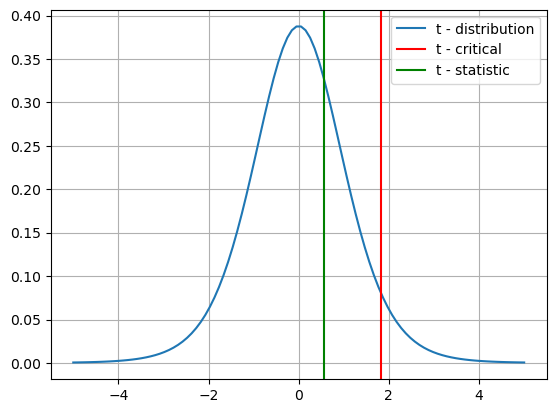

In [56]:
x = np.linspace(-5, 5, 100)
y = stats.t.pdf(x, 9)

plt.plot(x, y, label="t - distribution")
plt.axvline(t_critical, color="red", label="t - critical")
plt.axvline(t_stat, color="green", label="t - statistic")
plt.grid(visible=True, axis='both')
plt.legend()
plt.show()

### Вывод:
Поскольку абсолютное значение рассчитанной нами t-статистики (0,563) меньше критического t-значения (1,833), мы не можем отвергнуть нулевую гипотезу. Поэтому мы можем заключить, что нет достаточных доказательств, чтобы отвергнуть утверждение о том, что партия имеет среднее арифметическое 2,5 см на 5% уровне значимости.